# Load dataset and create houses

In [ ]:
import pandas as pd
import numpy as np
import random

# Districts, population density, and area (in square km)
districts = {
    'Central Delhi': {'density': 52129, 'area': 23},
    'North Delhi': {'density': 27683, 'area': 291},
    'South Delhi': {'density': 10978, 'area': 249},
    'East Delhi': {'density': 276683, 'area': 64},
    'West Delhi': {'density': 19325, 'area': 131},
    'New Delhi': {'density': 71145, 'area': 17},
    'North East Delhi': {'density': 35483, 'area': 62},
    'South West Delhi': {'density': 5459, 'area': 420},
    'South East Delhi': {'density': 14712, 'area': 102},
    'North West Delhi': {'density': 15603, 'area': 234},
    'Shahdara': {'density': 57627, 'area': 59}
}

# Total houses to distribute
total_houses = 1000

# Latitude and Longitude boundaries for Delhi
lat_min, lat_max = 28.000, 29.000
lon_min, lon_max = 77.000, 77.900

# Step 1: Calculate the total density to normalize the number of houses
total_density = sum([district['density'] for district in districts.values()])

# Step 2: Calculate the number of houses for each district based on its density
house_distribution = {}
for district_name, data in districts.items():
    house_distribution[district_name] = int((data['density'] / total_density) * total_houses)

# Step 3: Define the geographic ranges for each district
district_geographies = {
  'Central Delhi': (28.60, 28.80, 77.50, 77.80),
    'North Delhi': (28.00, 28.80, 77.80, 77.99),
    'South Delhi': (28.60, 28.80, 77.00, 77.30),
    'East Delhi': (28.80, 28.99, 77.40, 77.60),
    'West Delhi': (28.00, 28.50, 77.30, 77.50),
    'New Delhi': (28.50, 28.80, 77.30, 77.50),
    'North East Delhi': (28.80, 28.99, 77.70, 77.99),
    'South West Delhi': (28.00, 28.60, 77.00, 77.30),
    'South East Delhi': (28.80, 28.99, 77.00, 77.40),
    'North West Delhi': (28.00, 28.60, 77.50, 77.80),
    'Shahdara': (28.80, 28.99, 77.60, 77.70)
}

# Step 4: Generate data for all houses
house_number = []
latitude = []
longitude = []
district = []

# Function to generate random latitude and longitude for a given district
def generate_lat_lon(district_name):
    lat_min, lat_max, lon_min, lon_max = district_geographies[district_name]
    latitude = random.uniform(lat_min, lat_max)
    longitude = random.uniform(lon_min, lon_max)
    return latitude, longitude

# Step 5: Generate house data
for district_name, num_houses in house_distribution.items():
    for _ in range(num_houses):
        house_number.append(len(house_number) + 1)
        lat, lon = generate_lat_lon(district_name)
        latitude.append(lat)
        longitude.append(lon)
        district.append(district_name)

# Step 6: Create DataFrame and save to CSV
houses_df = pd.DataFrame({
    'House Number': house_number,
    'Latitude': latitude,
    'Longitude': longitude,
    'District': district
})

# Save to CSV file
houses_df.to_csv('delhi_houses.csv', index=False)

# Display first few rows to verify
houses_df.head()

,House Number,Latitude,Longitude,District
0,1,28.601236,77.546534,Central Delhi
1,2,28.756302,77.650153,Central Delhi
2,3,28.602089,77.793015,Central Delhi
3,4,28.630273,77.597888,Central Delhi
4,5,28.698537,77.585241,Central Delhi


# Plot the city graph

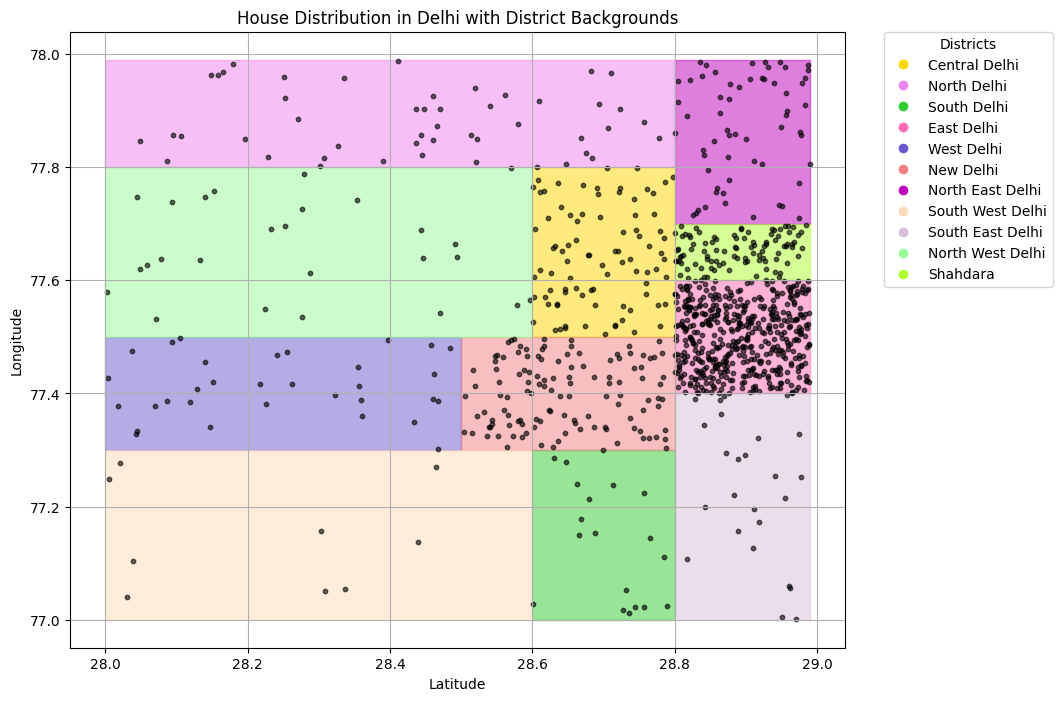

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Step 1: Load the data from the CSV file
houses_df = pd.read_csv('delhi_houses.csv')

# Step 2: Define the districts with their geographical ranges
district_geographies = {

    'Central Delhi': (28.60, 28.80, 77.50, 77.80),
    'North Delhi': (28.00, 28.80, 77.80, 77.99),
    'South Delhi': (28.60, 28.80, 77.00, 77.30),
    'East Delhi': (28.80, 28.99, 77.40, 77.60),
    'West Delhi': (28.00, 28.50, 77.30, 77.50),
    'New Delhi': (28.50, 28.80, 77.30, 77.50),
    'North East Delhi': (28.80, 28.99, 77.70, 77.99),
    'South West Delhi': (28.00, 28.60, 77.00, 77.30),
    'South East Delhi': (28.80, 28.99, 77.00, 77.40),
    'North West Delhi': (28.00, 28.60, 77.50, 77.80),
    'Shahdara': (28.80, 28.99, 77.60, 77.70)
}

# Step 3: Set up the plot
plt.figure(figsize=(10, 8))

# Step 4: Plot the district regions with background colors
colors = {

    'Central Delhi': 'gold',
    'North Delhi': 'violet',
    'South Delhi': 'limegreen',
    'East Delhi': 'hotpink',
    'West Delhi': 'slateblue',
    'New Delhi': 'lightcoral',
    'North East Delhi': 'm',
    'South West Delhi': 'peachpuff',
    'South East Delhi': 'thistle',
    'North West Delhi': 'palegreen',
    'Shahdara': 'greenyellow'
}

# Loop through the districts and fill the background
for district_name, (lat_min, lat_max, lon_min, lon_max) in district_geographies.items():
    plt.fill_betweenx([lon_min, lon_max], lat_min, lat_max, color=colors[district_name], alpha=0.5)

# Step 5: Plot the houses (nodes) on the graph
plt.scatter(houses_df['Latitude'], houses_df['Longitude'], c='black', s=10, alpha=0.6, label='House')

# Step 6: Set labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('House Distribution in Delhi with District Backgrounds')
plt.grid(True)

# Step 7: Add a legend for the districts (placed outside the plot)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors.values()]
plt.legend(
    handles=handles,
    labels=colors.keys(),
    title='Districts',
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Moves legend outside the plot
    borderaxespad=0.
)

# Step 8: Show the plot
plt.show()


# Simulate the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import networkx as nx
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button
import matplotlib

from geopy.distance import geodesic
matplotlib.use('TkAgg')

# Load the data from CSV
houses_df = pd.read_csv('delhi_houses.csv')
district_radius = 5000  # 5 km radius for in-district neighbors
max_neighbors = 10
peak_infected = {'value': 0, 'time': 0}
# AQI data for each district
district_aqi = {
    'Central Delhi': 323,      # Very Poor
    'North Delhi': 431,        # Very Poor
    'South Delhi': 555,        # Poor
    'East Delhi': 326,         # Very Poor
    'West Delhi': 329,         # Very Poor
    'New Delhi': 280,          # Poor
    'North East Delhi': 318,   # Severe
    'South West Delhi': 280,   # Poor
    'South East Delhi': 310,   # Poor
    'North West Delhi': 298,   # Very Poor
    'Shahdara': 332            # Very Poor
}

AQI_REF = 50  # Reference AQI value

# Assign AQI values to each house based on district
houses_df['AQI'] = houses_df['District'].map(district_aqi)

# Create the graph
G = nx.Graph()
positions = {}
node_aqi = {}  # Store AQI for each node
node_district = {}  # Store district for each node

for idx, row in houses_df.iterrows():
    node_id = idx
    lat, lon = row['Latitude'], row['Longitude']
    district = row['District']
    aqi = district_aqi[district]

    G.add_node(node_id, pos=(lat, lon), district=district, aqi=aqi)
    positions[node_id] = (lat, lon)
    node_aqi[node_id] = aqi
    node_district[node_id] = district

def calculate_distance(node1, node2):
    lat1, lon1 = positions[node1]
    lat2, lon2 = positions[node2]
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# Function to create edges based on proximity and randomness
for node in G.nodes:
    # List of possible in-district neighbors
    in_district_neighbors = [n for n in G.nodes if node_district[n] == node_district[node] and node != n]

    # List of possible out-of-district neighbors
    out_of_district_neighbors = [n for n in G.nodes if node_district[n] != node_district[node] and node != n]

    # First, add in-district neighbors based on distance
    in_district_within_radius = []
    for neighbor in in_district_neighbors:
        dist = calculate_distance(node, neighbor)
        if dist <= district_radius:
            in_district_within_radius.append((neighbor, dist))

    # Sort in-district neighbors by distance (nearest first)
    in_district_within_radius.sort(key=lambda x: x[1])  # Sort by distance

    in_district_count = 0
    # Add edges for in-district neighbors (max neighbors per node)
    for neighbor, dist in in_district_within_radius[:8]:
        G.add_edge(node, neighbor, weight=dist)
        in_district_count += 1

    # print(f"Node {node} has {len(in_district_within_radius)} in-district neighbors within radius.")

    # Now, add out-of-district random neighbors
    remaining_neighbors = max_neighbors - in_district_count
    random_out_of_district = random.sample(out_of_district_neighbors, min(len(out_of_district_neighbors), remaining_neighbors))

    # Add edges for out-of-district neighbors
    for neighbor in random_out_of_district:
        dist = calculate_distance(node, neighbor)
        G.add_edge(node, neighbor, weight=dist)

# Initialize all nodes as Susceptible
states = {node: 'S' for node in G.nodes}
initial_infected_nodes = []
running = {'status': False}
frame_count = {'value': 0}  # To keep track of simulation ticks
history = {'S': [], 'I': [], 'R': []}  # For tracking population states over time

# Set up the main figure and axes
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(5, 4)
ax_map = fig.add_subplot(gs[:4, :3])  # Main simulation area
ax_plot = fig.add_subplot(gs[0:2, 3])  # Area for population plot
ax_aqi = fig.add_subplot(gs[2:4, 3])   # Area for AQI information

plt.subplots_adjust(left=0.1, bottom=0.35, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

# Define colors for different states
node_colors = {'S': 'blue', 'I': 'red', 'R': 'green'}

# Draw initial network
nx.draw(G, pos=positions, node_color=[node_colors[states[n]] for n in G.nodes],
        node_size=20, ax=ax_map, with_labels=False)

# Add control sliders
ax_beta = plt.axes([0.2, 0.25, 0.65, 0.03])
ax_days_recovery = plt.axes([0.2, 0.20, 0.65, 0.03])  # Slider for days to recovery
ax_resusceptible = plt.axes([0.2, 0.15, 0.65, 0.03])
ax_tick_speed = plt.axes([0.2, 0.10, 0.65, 0.03])
ax_initial_count = plt.axes([0.2, 0.05, 0.65, 0.03])

slider_beta = Slider(ax_beta, 'Infection Rate (β)', 0.0, 1.0, valinit=0.2)
slider_days_recovery = Slider(ax_days_recovery, 'Days to Recovery', 1, 30, valinit=14, valstep=1)
slider_resusceptible = Slider(ax_resusceptible, 'Resusceptible Rate (ξ)', 0.0, 0.1, valinit=0.01)
slider_speed = Slider(ax_tick_speed, 'Tick Speed (ms)', 100, 2000, valinit=500)
slider_initial_count = Slider(ax_initial_count, 'Initial Infected Count', 1, len(G.nodes)//10, valinit=5, valstep=1)

# Control buttons
ax_button_start = plt.axes([0.05, 0.29, 0.1, 0.04])
ax_button_stop = plt.axes([0.16, 0.29, 0.1, 0.04])
ax_button_setup = plt.axes([0.27, 0.29, 0.1, 0.04])
ax_button_reset = plt.axes([0.38, 0.29, 0.1, 0.04])

start_button = Button(ax_button_start, 'Start')
stop_button = Button(ax_button_stop, 'Stop')
setup_button = Button(ax_button_setup, 'Re-Setup')
reset_button = Button(ax_button_reset, 'Reset')

# Setup function to select initial infected nodes
def setup_infection(event=None):
    global initial_infected_nodes, peak_infected
    count = int(slider_initial_count.val)
    initial_infected_nodes = random.sample(list(G.nodes), count)
    for node in G.nodes:
        states[node] = 'S'
    for node in initial_infected_nodes:
        states[node] = 'I'
    frame_count['value'] = 0
    history['S'] = []
    history['I'] = []
    history['R'] = []
    peak_infected = {'value': 0, 'time': 0}  # Reset peak tracking
    update_graph(0)

# Reset simulation
def reset_simulation(event):
    stop_simulation(None)
    for node in G.nodes:
        states[node] = 'S'
    frame_count['value'] = 0
    history['S'] = []
    history['I'] = []
    history['R'] = []
    peak_infected = {'value': 0, 'time': 0}  # Reset peak tracking
    update_graph(0)

# Start, stop buttons
def start_simulation(event):
    running['status'] = True

def stop_simulation(event):
    running['status'] = False

start_button.on_clicked(start_simulation)
stop_button.on_clicked(stop_simulation)
setup_button.on_clicked(setup_infection)
reset_button.on_clicked(reset_simulation)

# Calculate AQI-adjusted recovery rate using the new formula
def get_adjusted_recovery_rate(node_id):
    aqi = node_aqi[node_id]
    days_to_recovery = slider_days_recovery.val

    # Apply formula: 1/(days_to_recovery + 4.13*(AQI-AQI_0)/10)
    adjusted_recovery = 1 / (days_to_recovery + 4.13 * (aqi - AQI_REF) / 10)

    # Ensure the recovery rate doesn't go too small or too large
    return max(0.01, min(0.5, adjusted_recovery))

# Show AQI information in the AQI panel
def update_aqi_panel():
    ax_aqi.clear()

    # Create a color map for AQI
    aqi_values = list(district_aqi.values())
    districts = list(district_aqi.keys())

    # Sort by AQI value for better display
    sorted_indices = np.argsort(aqi_values)
    sorted_districts = [districts[i] for i in sorted_indices]
    sorted_values = [aqi_values[i] for i in sorted_indices]

    # Create horizontal bar chart for AQI values
    bars = ax_aqi.barh(sorted_districts, sorted_values, color=get_aqi_colors(sorted_values))

    # Add AQI value labels to the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax_aqi.text(width + 5, bar.get_y() + bar.get_height()/2,
                   f'{sorted_values[i]}', ha='left', va='center')

    # ax_aqi.set_title('Air Quality Index (AQI) by District')
    ax_aqi.set_xlim(0, 600)  # AQI typically ranges from 0-600

    # Add AQI category lines and labels
    categories = [(0, 50, 'Good', 'green'),
                  (51, 100, 'Satisfactory', 'lightgreen'),
                  (101, 200, 'Moderate', 'yellow'),
                  (201, 300, 'Poor', 'orange'),
                  (301, 400, 'Very Poor', 'red'),
                  (401, 500, 'Severe', 'darkred')]

    for start, end, label, color in categories:
        ax_aqi.axvspan(start, end, alpha=0.2, color=color)
        ax_aqi.text(start + (end-start)/2, -0.6, label, ha='center', va='top',
                   fontsize=8, rotation=90, color='black')

# Helper function to get AQI colors
def get_aqi_colors(aqi_values):
    colors = []
    for aqi in aqi_values:
        if aqi <= 50:
            colors.append('green')
        elif aqi <= 100:
            colors.append('lightgreen')
        elif aqi <= 200:
            colors.append('yellow')
        elif aqi <= 300:
            colors.append('orange')
        elif aqi <= 400:
            colors.append('red')
        else:
            colors.append('darkred')
    return colors

# Update population plot function
def update_population_plot():
    global peak_infected
    ax_plot.clear()

    # Only plot if we have data
    if len(history['S']) > 0:
        t = range(len(history['S']))
        ax_plot.plot(t, history['S'], 'b-', label='Susceptible')
        ax_plot.plot(t, history['I'], 'r-', label='Infected')
        ax_plot.plot(t, history['R'], 'g-', label='Recovered')

        # Track peak infection
        current_infected = history['I'][-1]
        if current_infected > peak_infected['value']:
            peak_infected['value'] = current_infected
            peak_infected['time'] = frame_count['value']

        # Mark the peak with a star marker
        if peak_infected['value'] > 0 and peak_infected['time'] < len(history['I']):
            ax_plot.plot(peak_infected['time'], peak_infected['value'], 'r*', markersize=10)
            ax_plot.annotate(f'Peak: {peak_infected["value"]} at tick {peak_infected["time"]}',
                           xy=(peak_infected['time'], peak_infected['value']),
                           xytext=(peak_infected['time']+5, peak_infected['value']+20),
                           arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Graph update function
def update_graph(frame):
    # Update frame count
    frame_count['value'] = frame

    # Clear main map axis
    ax_map.clear()

    # Draw network with current states
    nx.draw(G, pos=positions, node_color=[node_colors[states[n]] for n in G.nodes],
             node_size=20, ax=ax_map, with_labels=False)

    # Count population states
    status_counts = {"S": 0, "I": 0, "R": 0}
    for state in states.values():
        status_counts[state] += 1

    # Add counts to history for plotting
    history['S'].append(status_counts['S'])
    history['I'].append(status_counts['I'])
    history['R'].append(status_counts['R'])

    # Update the population plot
    update_population_plot()

    # Update the AQI panel
    update_aqi_panel()

    # Update the main title
    ax_map.set_title(f"Delhi Virus Spread Simulation (SIRS with AQI) — Tick {frame_count['value']}\n"
                     + f"S: {status_counts['S']}, I: {status_counts['I']}, R: {status_counts['R']}\n")

# Simulation logic
def update(frame):
    if not running['status']:
        return

    beta = slider_beta.val
    xi = slider_resusceptible.val  # Rate for R->S transition
    lambda_decay = 0.001  # Decay factor for distance-based infection rate

    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 'S':
            for neighbor in G.neighbors(node):
                if states[neighbor] == 'I':
                    distance = G[node][neighbor]['weight']
                    beta_ij = beta * (1000 / distance)
                    beta_ij = beta * np.exp(-lambda_decay * (distance/1000))
                    # print(beta_ij, distance)
                    if random.random() < beta_ij:
                        new_states[node] = 'I'
                        break

        elif states[node] == 'I':
            # Use the simplified recovery rate formula
            adjusted_recovery_rate = get_adjusted_recovery_rate(node)

            if random.random() < adjusted_recovery_rate:
                new_states[node] = 'R'

        elif states[node] == 'R':
            # SIRS: Recovered can become Susceptible again
            if random.random() < xi:
                new_states[node] = 'S'

    states.update(new_states)
    update_graph(frame_count['value'] + 1)

# Initialize with some infected nodes
setup_infection()

# Animation object with dynamic speed
anim = FuncAnimation(fig, update, interval=slider_speed.val, cache_frame_data=False)

def adjust_speed(val):
    anim.event_source.interval = slider_speed.val

slider_speed.on_changed(adjust_speed)

plt.show()

_ = anim

KeyboardInterrupt: 

# Traditional SIRS Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.2          # Infection rate
gamma = 1/14         # Recovery rate (14 days)
delta = 0.01         # Rate of loss of immunity
T = 365            # Number of days
N = 995             # Total population

# Initial conditions
S0 = 990
I0 = 5
R0 = 0

# Time series storage
S = np.zeros(T)
I = np.zeros(T)
R = np.zeros(T)
S[0], I[0], R[0] = S0, I0, R0

# SIRS Model Iteration
for t in range(1, T):
    dS = -beta * S[t-1] * I[t-1] / N + delta * R[t-1]
    dI = beta * S[t-1] * I[t-1] / N - gamma * I[t-1]
    dR = gamma * I[t-1] - delta * R[t-1]

    S[t] = S[t-1] + dS
    I[t] = I[t-1] + dI
    R[t] = R[t-1] + dR


peak_time = np.argmax(I)
peak_value = I[peak_time]

print(f"Peak infection at day {peak_time} with {peak_value:.2f} infected individuals")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible', color='blue')
plt.plot(I, label='Infected', color='red')
plt.plot(R, label='Recovered', color='green')
plt.xlabel("Time in days")
plt.ylabel("Number of Individuals")
plt.title("SIRS Model Simulation")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Peak infection at day 49 with 296.05 infected individuals
